In [335]:
import pandas as pd
import numpy as py
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline
pd.set_option('display.max_columns', None)

In [336]:
df = pd.read_csv("./resale-clean-and-transformed.csv")

/Users/davidlam/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [337]:
df

,town,flat_type,flat_model,floor_area_sqm,street_name,resale_price,month,lease_commence_date,storey_range,block,remaining_lease,full_address,latitude,longitude,year,minimum_distance,closest_station,cpi,adjusted_price,calculated_remaining_lease
0,ANG MO KIO,1 ROOM,IMPROVED,31.0,ANG MO KIO AVE 1,9000.0,1,1977,10 TO 12,309,NaN,309 ANG MO KIO AVE 1,1.369530,103.848440,1990,0.001184,ANG MO KIO MRT STATION,62.1,14492.753623,86
1,ANG MO KIO,1 ROOM,IMPROVED,31.0,ANG MO KIO AVE 1,6000.0,1,1977,04 TO 06,309,NaN,309 ANG MO KIO AVE 1,1.369530,103.848440,1990,0.001184,ANG MO KIO MRT STATION,62.1,9661.835749,86
2,ANG MO KIO,1 ROOM,IMPROVED,31.0,ANG MO KIO AVE 1,8000.0,1,1977,10 TO 12,309,NaN,309 ANG MO KIO AVE 1,1.369530,103.848440,1990,0.001184,ANG MO KIO MRT STATION,62.1,12882.447665,86
3,ANG MO KIO,1 ROOM,IMPROVED,31.0,ANG MO KIO AVE 1,6000.0,1,1977,07 TO 09,309,NaN,309 ANG MO KIO AVE 1,1.369530,103.848440,1990,0.001184,ANG MO KIO MRT STATION,62.1,9661.835749,86
4,ANG MO KIO,3 ROOM,NEW GENERATION,73.0,ANG MO KIO AVE 1,47200.0,1,1976,04 TO 06,216,NaN,216 ANG MO KIO AVE 1,1.366369,103.841084,1990,0.009189,ANG MO KIO MRT STATION,62.1,76006.441224,85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
842597,YISHUN,EXECUTIVE,MAISONETTE,146.0,YISHUN RING RD,650000.0,4,1988,10 TO 12,326,66 years 04 months,326 YISHUN RING RD,1.429692,103.842413,2021,0.007413,YISHUN MRT STATION,100.0,650000.000000,66
842598,YISHUN,EXECUTIVE,MAISONETTE,146.0,YISHUN RING RD,645000.0,4,1988,04 TO 06,360,66 years 04 months,360 YISHUN RING RD,1.427764,103.845765,2021,0.010890,YISHUN MRT STATION,100.0,645000.000000,66
842599,YISHUN,EXECUTIVE,MAISONETTE,146.0,YISHUN RING RD,585000.0,4,1988,10 TO 12,326,66 years 04 months,326 YISHUN RING RD,1.429692,103.842413,2021,0.007413,YISHUN MRT STATION,100.0,585000.000000,66
842600,YISHUN,EXECUTIVE,MAISONETTE,146.0,YISHUN RING RD,675000.0,4,1988,10 TO 12,355,66 years 08 months,355 YISHUN RING RD,1.425348,103.844949,2021,0.010755,YISHUN MRT STATION,100.0,675000.000000,66


In [334]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 842602 entries, 0 to 842601
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   town                        842602 non-null  object 
 1   flat_type                   842602 non-null  object 
 2   flat_model                  842602 non-null  object 
 3   floor_area_sqm              842602 non-null  float64
 4   street_name                 842602 non-null  object 
 5   resale_price                842602 non-null  float64
 6   month                       842602 non-null  int64  
 7   lease_commence_date         842602 non-null  int64  
 8   storey_range                842602 non-null  object 
 9   _id                         842602 non-null  int64  
 10  block                       842602 non-null  object 
 11  remaining_lease             133548 non-null  object 
 12  full_address                842602 non-null  object 
 13  latitude      

In [302]:
df.flat_type.unique()

array(['1 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE',
       'MULTI GENERATION', 'MULTI-GENERATION'], dtype=object)

In [303]:
df.flat_model.unique()

array(['IMPROVED', 'NEW GENERATION', 'MODEL A', 'STANDARD', 'SIMPLIFIED',
       'MODEL A-MAISONETTE', 'APARTMENT', 'MAISONETTE', 'TERRACE',
       '2-ROOM', 'IMPROVED-MAISONETTE', 'MULTI GENERATION',
       'PREMIUM APARTMENT', 'ADJOINED FLAT', 'PREMIUM MAISONETTE',
       'MODEL A2', 'DBSS', 'TYPE S1', 'TYPE S2', 'PREMIUM APARTMENT LOFT'],
      dtype=object)

In [304]:
def haversine_vectorize(lon1, lat1, lon2, lat2):

    lon1, lat1, lon2, lat2 = map(py.radians, [lon1, lat1, lon2, lat2])

    newlon = lon2 - lon1
    newlat = lat2 - lat1

    haver_formula = py.sin(newlat/2.0)**2 + py.cos(lat1) * py.cos(lat2) * py.sin(newlon/2.0)**2

    dist = 2 * py.arcsin(py.sqrt(haver_formula ))
    return dist

In [305]:
df['distance_from_central'] = haversine_vectorize(df['longitude'],df['latitude'],103.85205,1.29313)
df

,town,flat_type,flat_model,floor_area_sqm,street_name,resale_price,month,lease_commence_date,storey_range,_id,block,remaining_lease,full_address,latitude,longitude,year,minimum_distance,closest_station,cpi,adjusted_price,calculated_remaining_lease,distance_from_central
0,ANG MO KIO,1 ROOM,IMPROVED,31.0,ANG MO KIO AVE 1,9000.0,1,1977,10 TO 12,1,309,NaN,309 ANG MO KIO AVE 1,1.369530,103.848440,1990,0.001184,ANG MO KIO MRT STATION,62.1,14492.753623,86,0.001335
1,ANG MO KIO,1 ROOM,IMPROVED,31.0,ANG MO KIO AVE 1,6000.0,1,1977,04 TO 06,2,309,NaN,309 ANG MO KIO AVE 1,1.369530,103.848440,1990,0.001184,ANG MO KIO MRT STATION,62.1,9661.835749,86,0.001335
2,ANG MO KIO,1 ROOM,IMPROVED,31.0,ANG MO KIO AVE 1,8000.0,1,1977,10 TO 12,3,309,NaN,309 ANG MO KIO AVE 1,1.369530,103.848440,1990,0.001184,ANG MO KIO MRT STATION,62.1,12882.447665,86,0.001335
3,ANG MO KIO,1 ROOM,IMPROVED,31.0,ANG MO KIO AVE 1,6000.0,1,1977,07 TO 09,4,309,NaN,309 ANG MO KIO AVE 1,1.369530,103.848440,1990,0.001184,ANG MO KIO MRT STATION,62.1,9661.835749,86,0.001335
4,ANG MO KIO,3 ROOM,NEW GENERATION,73.0,ANG MO KIO AVE 1,47200.0,1,1976,04 TO 06,5,216,NaN,216 ANG MO KIO AVE 1,1.366369,103.841084,1990,0.009189,ANG MO KIO MRT STATION,62.1,76006.441224,85,0.001293
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
842597,YISHUN,EXECUTIVE,MAISONETTE,146.0,YISHUN RING RD,650000.0,4,1988,10 TO 12,96392,326,66 years 04 months,326 YISHUN RING RD,1.429692,103.842413,2021,0.007413,YISHUN MRT STATION,100.0,650000.000000,66,0.002389
842598,YISHUN,EXECUTIVE,MAISONETTE,146.0,YISHUN RING RD,645000.0,4,1988,04 TO 06,96393,360,66 years 04 months,360 YISHUN RING RD,1.427764,103.845765,2021,0.010890,YISHUN MRT STATION,100.0,645000.000000,66,0.002352
842599,YISHUN,EXECUTIVE,MAISONETTE,146.0,YISHUN RING RD,585000.0,4,1988,10 TO 12,96394,326,66 years 04 months,326 YISHUN RING RD,1.429692,103.842413,2021,0.007413,YISHUN MRT STATION,100.0,585000.000000,66,0.002389
842600,YISHUN,EXECUTIVE,MAISONETTE,146.0,YISHUN RING RD,675000.0,4,1988,10 TO 12,96395,355,66 years 08 months,355 YISHUN RING RD,1.425348,103.844949,2021,0.010755,YISHUN MRT STATION,100.0,675000.000000,66,0.002311


In [306]:
# df[df['latitude'].isna()]
df.storey_range.unique()
storey_map = {
    '01 TO 03': 1,
    '01 TO 05': 1.5,
    '04 TO 06': 2,
    '06 TO 10': 2.75,
    '07 TO 09': 3,
    '10 TO 12': 4,
    '11 TO 15': 4.5,
    '13 TO 15': 5,
    '16 TO 20': 5.75,
    '16 TO 18': 6,
    '19 TO 21': 7,
    '21 TO 25': 7.75,
    '22 TO 24': 8,
    '25 TO 27': 9,
    '26 TO 30': 9.5,
    '28 TO 30': 10,
    '31 TO 33': 11,
    '31 TO 35': 11.5,
    '34 TO 36': 12,
    '36 TO 40': 12.75,
    '37 TO 39': 13,
    '40 TO 42': 14,
    '43 TO 45': 15,
    '46 TO 48': 16,
    '49 TO 51': 17
}
df['storey_ordinal'] = df['storey_range'].map(storey_map)


In [309]:
analysis_df = df[['floor_area_sqm', 'minimum_distance', 'calculated_remaining_lease', 'adjusted_price', 'storey_ordinal', 'distance_from_central']].copy()

In [310]:
analysis_df

,floor_area_sqm,minimum_distance,calculated_remaining_lease,adjusted_price,storey_ordinal,distance_from_central
0,31.0,0.001184,86,14492.753623,4.0,0.001335
1,31.0,0.001184,86,9661.835749,2.0,0.001335
2,31.0,0.001184,86,12882.447665,4.0,0.001335
3,31.0,0.001184,86,9661.835749,3.0,0.001335
4,73.0,0.009189,85,76006.441224,2.0,0.001293
...,...,...,...,...,...,...
842597,146.0,0.007413,66,650000.000000,4.0,0.002389
842598,146.0,0.010890,66,645000.000000,2.0,0.002352
842599,146.0,0.007413,66,585000.000000,4.0,0.002389
842600,146.0,0.010755,66,675000.000000,4.0,0.002311


In [311]:
analysis_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 842602 entries, 0 to 842601
Data columns (total 6 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   floor_area_sqm              842602 non-null  float64
 1   minimum_distance            842602 non-null  float64
 2   calculated_remaining_lease  842602 non-null  int64  
 3   adjusted_price              842602 non-null  float64
 4   storey_ordinal              842602 non-null  float64
 5   distance_from_central       842602 non-null  float64
dtypes: float64(5), int64(1)
memory usage: 38.6 MB


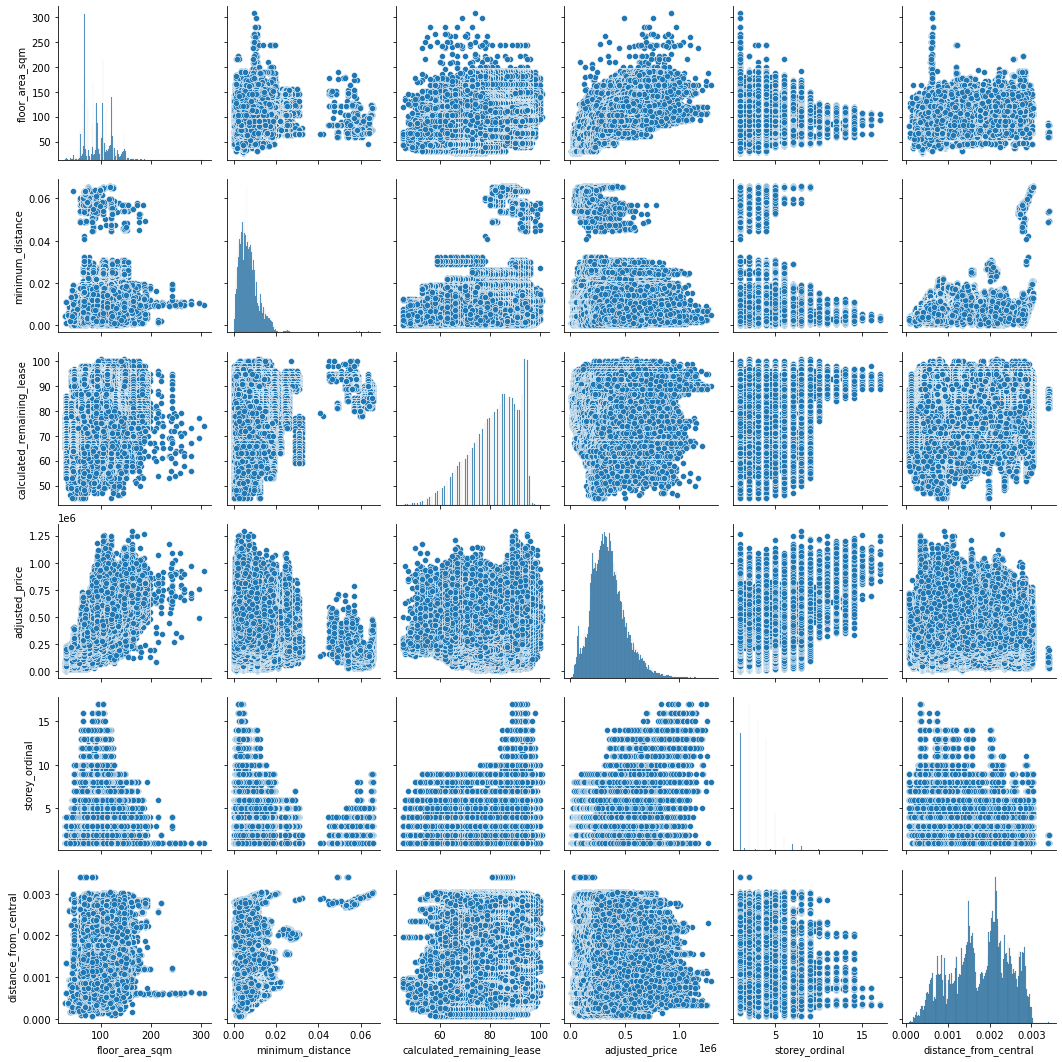

In [312]:
sns.pairplot(analysis_df)

/Users/davidlam/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='adjusted_price', ylabel='Density'>

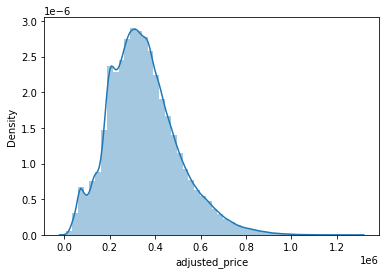

In [313]:
sns.distplot(analysis_df['adjusted_price'])

In [314]:
X = analysis_df[['floor_area_sqm', 'minimum_distance', 'storey_ordinal']]

In [315]:
y = analysis_df['adjusted_price']

In [316]:
from sklearn.model_selection import train_test_split

In [317]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=101)

In [318]:
from sklearn.linear_model import LinearRegression

In [319]:
lm = LinearRegression()

In [320]:
lm.fit(X_train, y_train)

LinearRegression()

In [321]:
print(lm.intercept_)

-90279.08672186598


In [322]:
lm.coef_

array([    4320.33548479, -2855004.98199228,    16819.11211842])

In [323]:
X_train.columns

Index(['floor_area_sqm', 'minimum_distance', 'storey_ordinal'], dtype='object')

In [324]:
cdf = pd.DataFrame(lm.coef_,X.columns,columns=['Coeff'])

In [325]:
cdf

,Coeff
floor_area_sqm,4.320335e+03
minimum_distance,-2.855005e+06
storey_ordinal,1.681911e+04


In [326]:
predictions = lm.predict(X_test)

In [327]:
predictions

array([413409.49746809, 543120.04258354, 398045.41840024, ...,
       239900.13141188, 198794.30240087, 387389.04335234])

In [328]:
y_test

171601    417652.791313
180821    780401.737242
575738    405479.452055
339996    292535.747081
498926    484286.450283
              ...      
30820     176488.643339
122906    386874.910446
128276    222094.855997
367904    144179.184549
682598    418026.280977
Name: adjusted_price, Length: 337041, dtype: float64

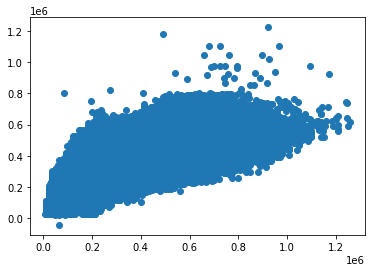

In [329]:
plt.scatter(y_test,predictions)

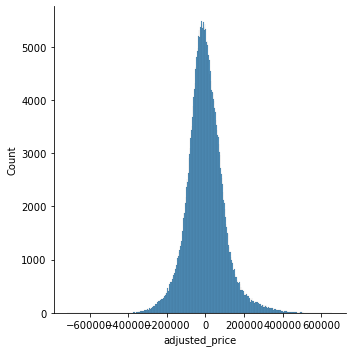

In [330]:
sns.displot((y_test-predictions)) # histogram of residuals